# Make stress evaluation by PCA 

Based on the created pipeline, we can compress the stress evaluation steps in a streamlined manner,
which makes it easy to the quickly repeatable assessment and observation the results.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_pca_scores(pca_scores, pc_x=1, pc_y=2, labels=None, title=None, figsize=(8, 6)):
    """
    Plot PCA scores in 2D for specified PCs, with optional color-coded labels.

    Parameters:
    - pca_scores: DataFrame with PCs as columns (e.g., 'PC1', 'PC2')
    - pc_x, pc_y: int, principal components to plot (1-indexed)
    - labels: list-like or Series of labels (can be strings)
    - title: str, optional title
    - figsize: tuple, figure size
    """
    x_col = f"{pc_x}"
    y_col = f"{pc_y}"

    if x_col not in pca_scores.columns or y_col not in pca_scores.columns:
        raise ValueError(f"PC columns {x_col} or {y_col} not found in DataFrame")

    plt.figure(figsize=figsize)

    if labels is not None:
        labels = pd.Series(labels).astype("category")
        label_codes = labels.cat.codes  # convert to numeric categories

        scatter = plt.scatter(pca_scores[x_col], pca_scores[y_col],
                              c=label_codes, cmap='tab10', edgecolor='k', alpha=0.7)

        # Legend with label names
        handles, _ = scatter.legend_elements()
        legend_labels = labels.cat.categories
        # plt.legend(handles, legend_labels, title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.scatter(pca_scores[x_col], pca_scores[y_col], edgecolor='k', alpha=0.7)

    # Optional: annotate points with their index
    for idx, (x, y) in pca_scores[[x_col, y_col]].iterrows():
        plt.text(x, y, str(idx), fontsize=7, alpha=0.6)

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title or f"{x_col} vs {y_col}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# test the PCA
importlib.reload(pca_)

stress_data = pd.read_excel("../data/chemical_data.xlsx", index_col=0)
stressor_data_scaled = stress_data.copy()

# extract the Principle Components (PCs) for pollutants
pollutant_pcs_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = True)),  # PCA returns loadings with variable names
    ('selector', pca_.PollutantPCSelector(pollutant_dict=non_toxic_pollutant_dict, threshold=0.6))
])

pollutant_pcs = pollutant_pcs_pipeline.fit_transform(stressor_data_scaled).index
print("Selected pollutant principal components:")
print(pollutant_pcs)

# extract the PCA scores for observations in the pollutant principle components
pcs_scores = pollutant_pcs_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = False)),  # PCA returns loadings with variable names
])

pollutant_pcs_scores = pcs_scores.fit_transform(stressor_data_scaled)[pollutant_pcs]

plot_pca_scores(pollutant_pcs_scores, pc_x=20, pc_y = 11, labels=pollutant_pcs_scores.index, title="PCA Scores for Observations (PC5 vs PC2)", figsize=(10, 8))

In [34]:
stressor_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, S1 to S102
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Al                  104 non-null    int64  
 1   As                  104 non-null    float64
 2   Bi                  104 non-null    float64
 3   Ca                  104 non-null    int64  
 4   Cd                  104 non-null    float64
 5   Co                  104 non-null    float64
 6   Cr                  104 non-null    float64
 7   Cu                  104 non-null    float64
 8   Fe                  104 non-null    int64  
 9   Hg                  104 non-null    float64
 10  K                   104 non-null    float64
 11  Mg                  104 non-null    int64  
 12  Mn                  104 non-null    float64
 13  Na                  104 non-null    float64
 14  Ni                  104 non-null    float64
 15  Pb                  104 non-null    float64
 16  Sb         

Selected pollutant principal components:
Index(['PC5', 'PC2', 'PC20', 'PC13', 'PC1', 'PC11'], dtype='object')


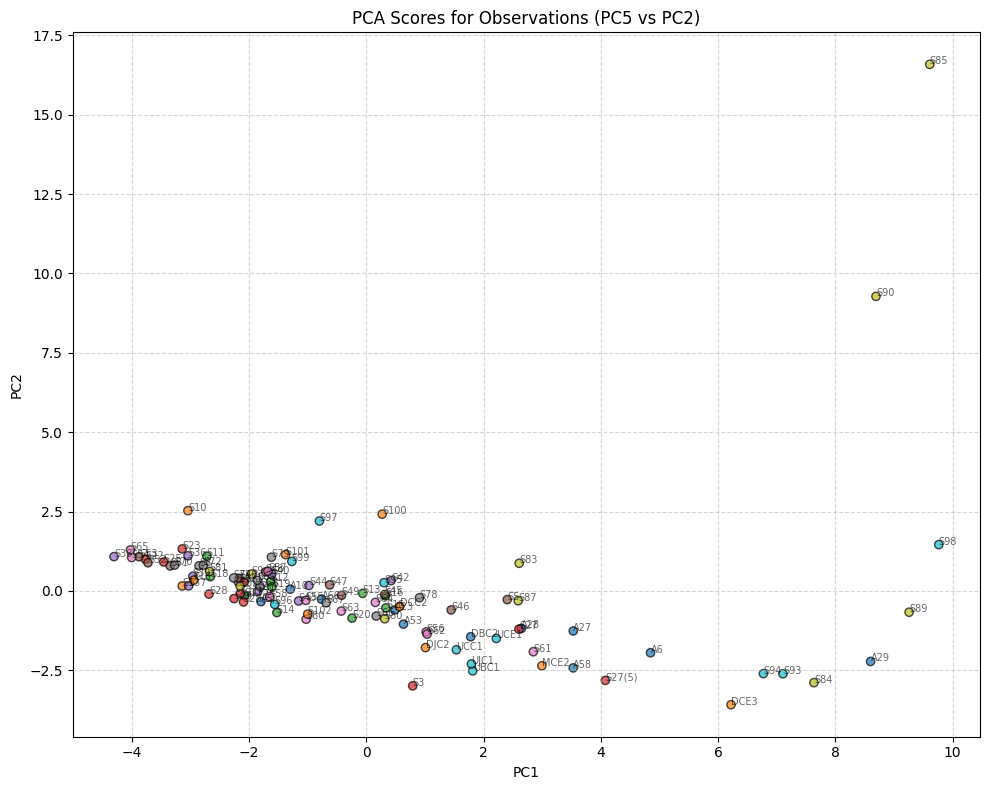

In [ ]:
import pandas as pd
from functools import wraps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# customized packages
from PyModules import PCAAssessment as pca_, DataStats
import importlib
importlib.reload(pca_)
# test the PCA

stress_data = pd.read_excel("../data/chemical_data.xlsx", index_col=0)
stressor_data_scaled = stress_data.copy()

# extract the Principle Components (PCs) for pollutants
pollutant_pcs_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = True)),  # PCA returns loadings with variable names
    ('selector', pca_.PollutantPCSelector(pollutant_dict=DataStats.nontoxic_pollutant_dict, threshold=0.6))
])

pollutant_pcs = pollutant_pcs_pipeline.fit_transform(stressor_data_scaled).index
print("Selected pollutant principal components:")
print(pollutant_pcs)

# extract the PCA scores for observations in the pollutant principle components
pcs_scores = pollutant_pcs_pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),  # Keeps column names
    ('pca', pca_.CustomWeightedPCA(weights=None, return_loadings = False)),  # PCA returns loadings with variable names
])

pollutant_pcs_scores = pcs_scores.fit_transform(stressor_data_scaled)[pollutant_pcs]

plot_pca_scores(pollutant_pcs_scores, pc_x="PC1", pc_y = "PC2", 
                labels=pollutant_pcs_scores.index, 
                title="PCA Scores for Observations (PC5 vs PC2)",
                figsize = (10, 8))


In this pipeline, we can also extract the observation scores and the loadings of the PCs

In [7]:
pollutant_pcs_scores

,PC5,PC2,PC20,PC13,PC1,PC11
StationNoID,,,,,,
S1,-0.408489,0.153719,0.216746,0.987933,-3.140669,-0.256047
S3,3.688714,-2.992930,0.107852,0.135550,0.790253,-1.224411
S4,0.618755,0.286057,0.047750,-0.506377,-2.184290,-0.309212
A5,-0.475166,-0.337929,0.608157,0.140515,-1.797105,0.050814
S5,0.812904,-0.275633,-0.801488,-0.014557,2.403213,-1.180630
...,...,...,...,...,...,...
S98,-3.010366,1.457502,-0.023921,1.989565,9.763885,-3.100807
S99,0.047177,0.926579,-0.115061,-0.471982,-1.270930,0.854691
S100,0.017758,2.418171,0.353885,0.363715,0.269883,-0.090302


A more flexible way can be: 
- Test performance of different data transformation methods (e.g., log transformation, scaling)
- Test performance of different weights for the transformed data for PCA
- ...

Selected pollutant principal components:
Index(['PC5', 'PC4', 'PC2', 'PC11', 'PC1'], dtype='object')
Selected pollutant principal components:
Index(['PC5', 'PC2', 'PC11', 'PC1', 'PC20', 'PC13'], dtype='object')
Selected pollutant principal components:
Index(['PC5', 'PC2', 'PC11', 'PC4', 'PC1'], dtype='object')
Selected pollutant principal components:
Index(['PC5', 'PC2', 'PC20', 'PC13', 'PC1', 'PC11'], dtype='object')


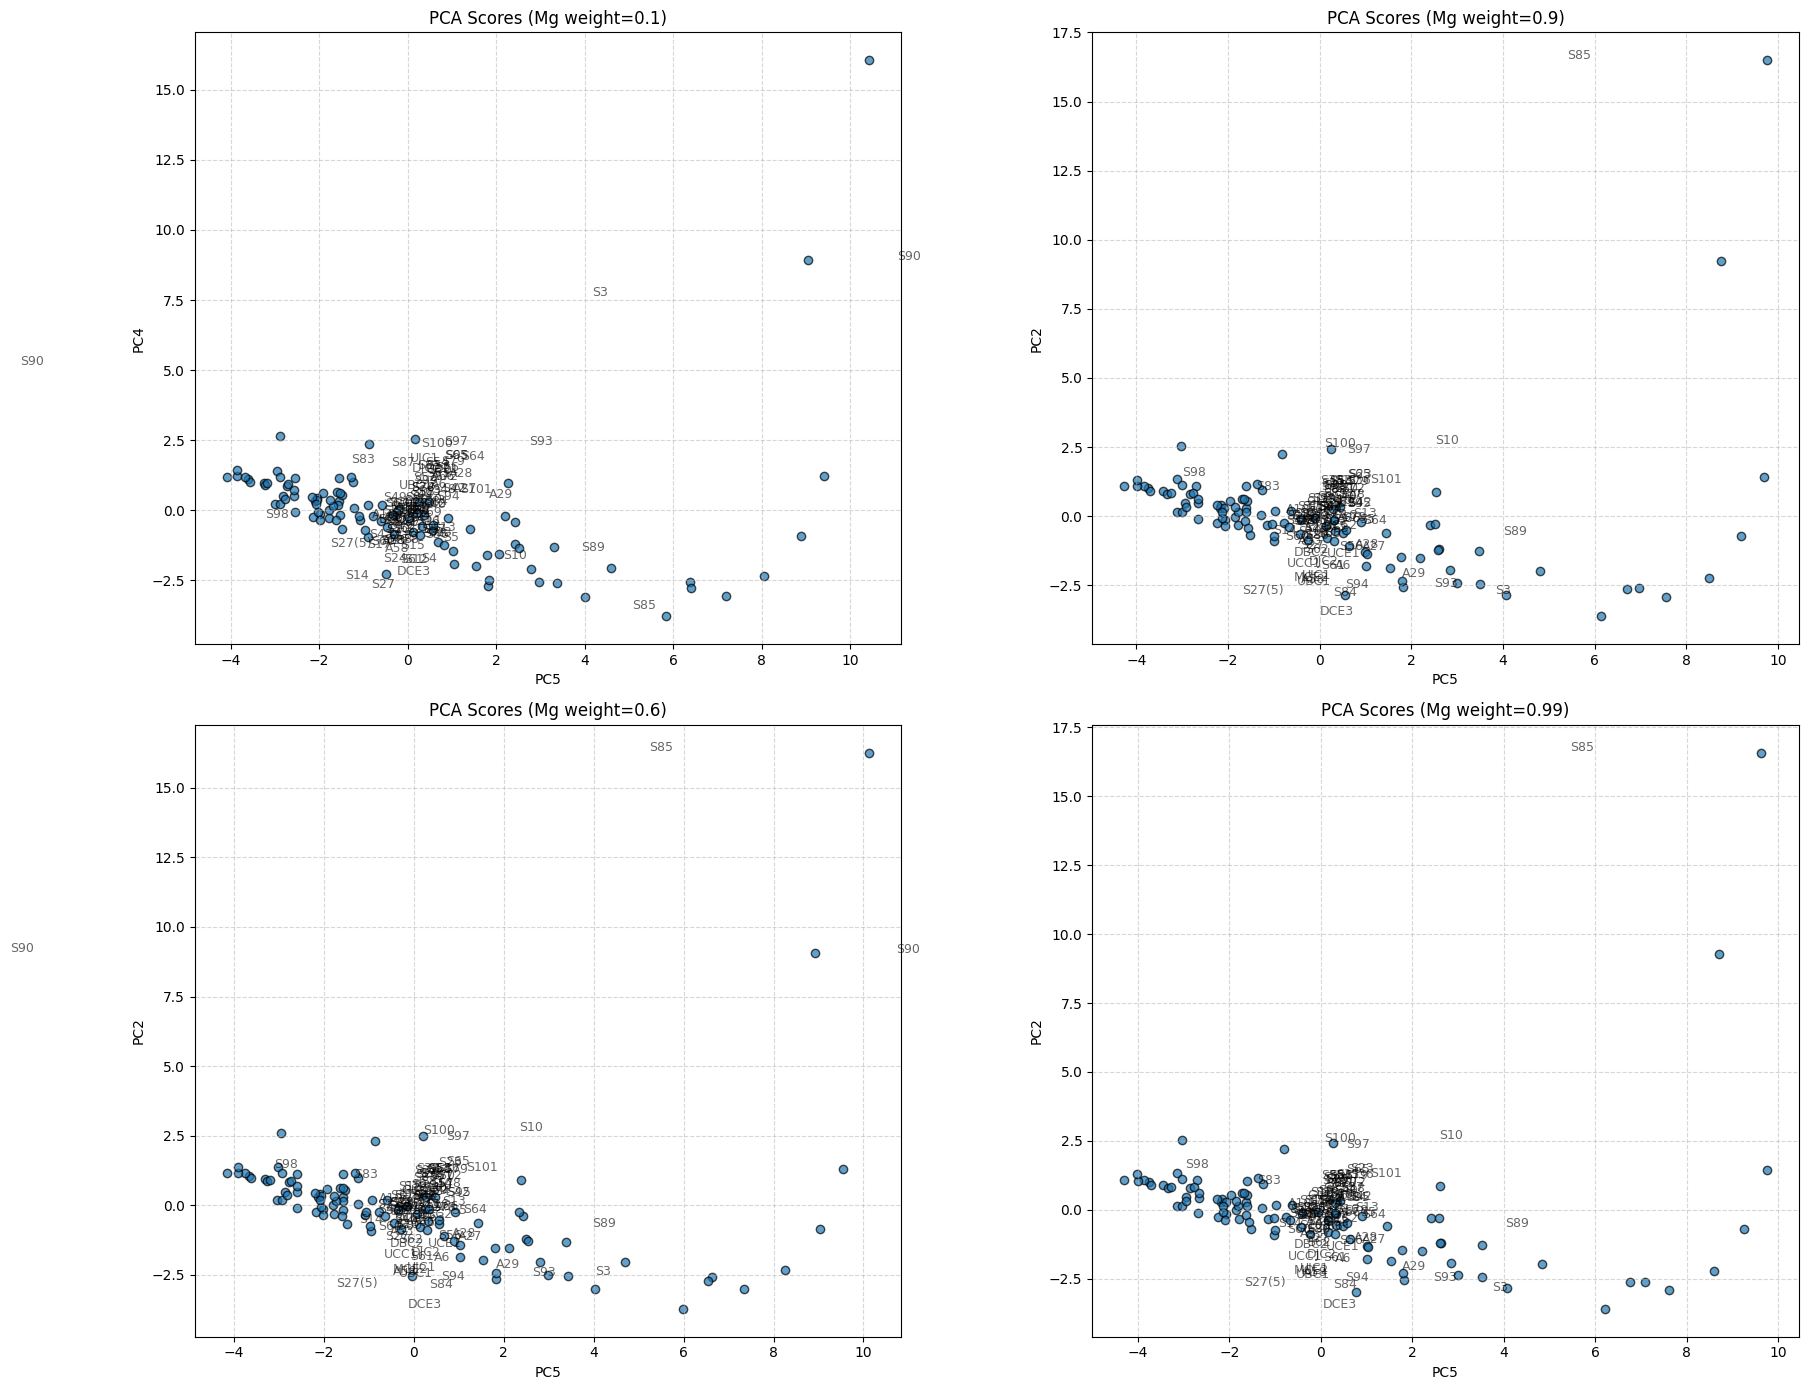

In [32]:
# test different weights for PCA
weights = [{"Fe": x} for x in [0.1, 0.9, 0.6, 0.99]]
pollutant_scs_scores_list = []

for weight in weights:
    # extract the Principle Components (PCs) for pollutants
    pollutant_pcs_pipeline = Pipeline([
        ('scaler', pca_.DataFrameScaler()),  # Keeps column names
        ('pca', pca_.CustomWeightedPCA(weights=weight, return_loadings = True)),  # PCA returns loadings with variable names
        ('selector', pca_.PollutantPCSelector(pollutant_dict=DataStats.nontoxic_pollutant_dict, threshold=0.6))
    ])

    pollutant_pcs = pollutant_pcs_pipeline.fit_transform(stressor_data_scaled).index
    print("Selected pollutant principal components:")
    print(pollutant_pcs)

    # extract the PCA scores for observations in the pollutant principle components
    pcs_scores = pollutant_pcs_pipeline = Pipeline([
        ('scaler', pca_.DataFrameScaler()),  # Keeps column names
        ('pca', pca_.CustomWeightedPCA(weights=weight, return_loadings = False)),  # PCA returns loadings with variable names
    ])

    pollutant_pcs_scores = pcs_scores.fit_transform(stressor_data_scaled)[pollutant_pcs]
    pollutant_scs_scores_list.append(pollutant_pcs_scores)

# Plot all resulting PCA scores for each weight in one figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for i, (scores, weight) in enumerate(zip(pollutant_scs_scores_list, weights)):
    # Use the first two PCs for each scores DataFrame
    pcs = scores.columns[:2]
    ax = axes[i]
    scatter = ax.scatter(scores["PC1"], scores["PC2"], edgecolor='k', alpha=0.7)
    ax.set_xlabel(pcs[0])
    ax.set_ylabel(pcs[1])
    ax.set_title(f"PCA Scores (Mg weight={weight['Fe']})")
    ax.grid(True, linestyle='--', alpha=0.5)
    # Optionally annotate points with their index (comment out if too crowded)
    for idx, (x, y) in scores[pcs].iterrows():
        ax.text(x + 0.05, y + 0.05, str(idx), fontsize=9, alpha=0.6)

plt.tight_layout()
# plt.savefig("../results/selected_PCs_of_weights", dpi=300)
plt.show()


# Visualize the results via another Module

Visualize the observation scores in selected PCs.

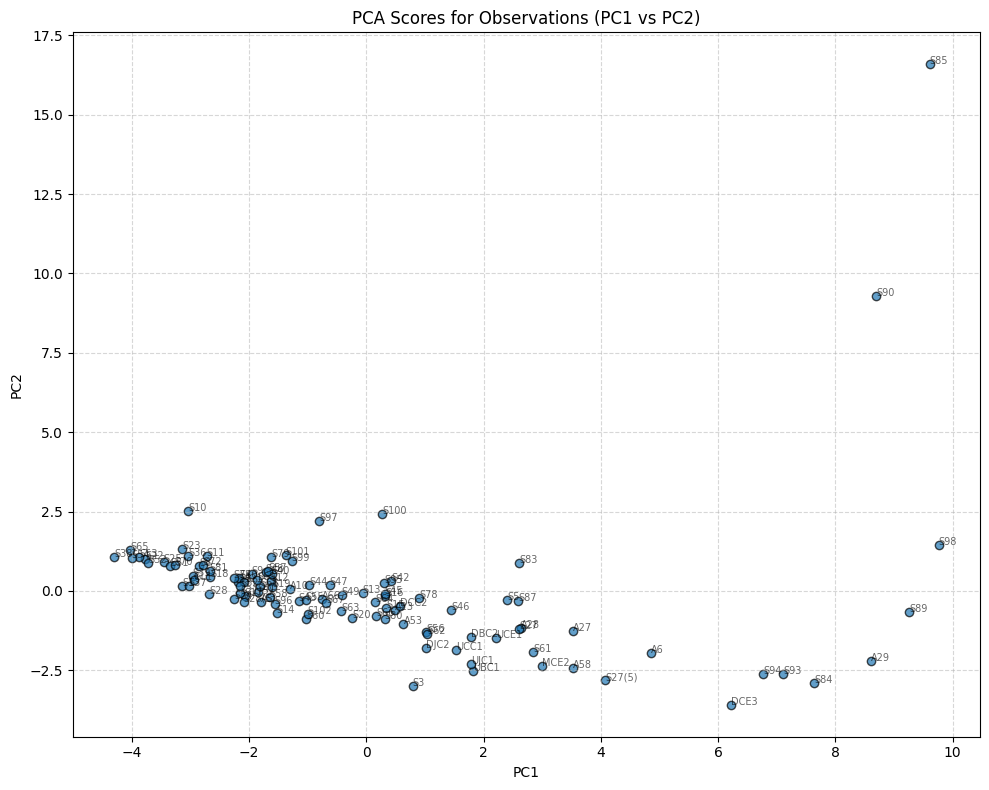

In [230]:
# use sklearn function to test the PCA results
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pipeline = Pipeline([
    ('scaler', pca_.DataFrameScaler()),
    # ("standardize", StandardScaler()), 
    ('pca', PCA())
])

X_pca = pipeline.fit_transform(stress_data)
# Return the PCA scores as a DataFrame with the same index as stress_data
X_pca_scores = pd.DataFrame(X_pca, index=stress_data.index, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_scores
plot_pca_scores(X_pca_scores, pc_x=1, pc_y=2, title="PCA Scores for Observations (PC1 vs PC2)", figsize=(10, 8))

In [201]:
pd.DataFrame(pipeline["scaler"].fit_transform(stress_data), index=stress_data.index, columns=stress_data.columns)

,Al,As,Bi,Ca,Cd,Co,Cr,Cu,Fe,Hg,...,1245-TCB,1234-TCB,QCB,HCB,OCS,"p,p'-DDE","p,p'-DDD",mirex,Heptachlor Epoxide,total PCB
StationNoID,,,,,,,,,,,,,,,,,,,,,
S1,-0.877860,0.093801,0.834284,1.014624,0.165487,-1.144531,-0.707329,-0.686343,-0.861922,-0.451872,...,-0.495938,-0.928122,-0.327055,-0.170561,-0.229364,0.082288,-0.183868,-0.481049,-0.283142,-0.342551
S3,-0.211175,-1.482986,-1.522017,0.162122,-0.448042,0.166232,-0.374992,-0.662499,4.047812,-0.148166,...,2.135338,0.973436,8.761751,9.990873,3.396690,-0.274709,-0.191803,-0.188112,0.537609,-0.230008
S4,-0.618099,0.163011,1.430904,0.729915,0.405230,-0.675840,-0.540869,-0.520201,-0.500340,1.405671,...,0.598610,-0.276941,1.089664,0.236730,-0.391815,-0.290346,-0.139003,-0.481049,3.680663,-0.137946
A5,-0.703497,0.196864,0.267545,0.829156,-0.377311,-0.827183,-0.299760,-0.294039,-0.348589,-0.448839,...,-0.370291,-0.229971,-0.265575,-0.174755,-0.216313,-0.236258,-0.148640,-0.481049,-0.283142,-0.303437
S5,0.283821,1.750330,1.001617,1.040655,1.703019,0.916661,-0.053653,-0.134448,0.240619,3.330528,...,1.891981,-0.409342,1.171007,0.730474,-0.391815,-0.259623,-0.135210,0.209813,-0.283142,-0.043701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S98,1.269133,0.900249,-1.720854,1.353022,5.676652,1.600059,4.441099,1.786133,2.812321,0.111234,...,-0.165882,2.266021,-0.278081,-0.153541,-0.335346,-0.223248,-0.080877,-0.481049,-0.283142,1.394031
S99,-0.582423,-0.569713,-0.229473,-1.318367,-0.193994,-0.134358,0.007999,-0.165563,-0.256599,-0.186606,...,-0.022243,1.582489,-0.298021,-0.173509,-0.391815,0.187168,-0.126500,-0.021852,-0.283142,-0.167367
S100,-0.602491,-0.551658,-1.730878,-1.546948,-0.156642,0.416550,0.569530,0.107518,0.569636,-0.229460,...,-0.288517,-0.316599,-0.184701,-0.024461,-0.256322,0.836259,0.596591,0.159048,-0.283142,1.569464


Use a function to convert this table into a Latex table with multirow support.

In [ ]:
# from Pymodules import Visualization to convert the DataFrame to LaTeX table
import importlib
import PyModules.Visualization  # import your module

importlib.reload(PyModules.Visualization)

Visualization.df_to_latex_with_multirow(
    pollutant_pcs_df,
    caption="Pollutant principal components with different weights", 
    label="tab:pollutant_pcs_weights", float_format="%.3f")

"\\begin{table}[htbp]\n\\centering\n\\small\n\\caption{Pollutant principal components with different weights}\n\\label{tab:pollutant_pcs_weights}\n\\begin{tabular}{llrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\nhyper-parameters & PC & As & Bi & Cd & Co & Cr & Cu & Hg & Mn & Ni & Pb & Sb & V & Zn & 1245-TCB & 1234-TCB & QCB & HCB & OCS & p,p'-DDE & p,p'-DDD & mirex & Heptachlor Epoxide & total PCB & Selected PCs loadings & Cumulative Explained Variance Ratio \\\\\n\\midrule\n\\multirow{5}{*}{standardize {'Mg': 0.1}} & PC5 & 0.109 & -0.230 & -0.112 & 0.099 & -0.130 & -0.258 & 0.181 & -0.066 & -0.059 & -0.155 & -0.169 & 0.111 & -0.282 & -0.032 & -0.053 & 0.177 & 0.240 & -0.025 & 0.371 & 0.284 & 0.351 & 0.138 & -0.279 & 0.211 & 0.063 \\\\\n & PC11 & -0.520 & -0.226 & -0.214 & -0.121 & -0.045 & 0.053 & -0.222 & 0.064 & -0.061 & -0.047 & -0.316 & -0.032 & -0.019 & 0.205 & 0.112 & -0.144 & -0.237 & 0.205 & 0.252 & -0.123 & 0.244 & 0.235 & 0.075 & -0.881 & 0.081 \\\\\n & PC2 & -0.069 & -0.054 & 0.21